In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### loading the data

In [2]:
dataset = datasets.load_boston()

C:\Users\Subhajit ghosh\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [7]:
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names
data_target = np.asarray(dataset.target)
data['House Price'] = pd.Series(data_target)

#input
X = data.iloc[:,:-1]

#output
y= data.iloc[:,-1]

data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape , y_train.shape )

print(X_test.shape , y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


## applying linear regression model

In [16]:
linear_reg = LinearRegression()
linear_reg.fit(X_train , y_train)

linear_reg_predict = linear_reg.predict(X_test)

mean_sq_error = np.mean((linear_reg_predict - y_test)**2)
print(mean_sq_error)

print("------------------------------------")

linear_reg_coeff = pd.DataFrame()
linear_reg_coeff['Columns'] = X_train.columns
linear_reg_coeff['Coefficient Estimate'] = pd.Series(linear_reg.coef_)
print(linear_reg_coeff)


29.782245092302485
------------------------------------
    Columns  Coefficient Estimate
0      CRIM             -0.117735
1        ZN              0.044017
2     INDUS             -0.005768
3      CHAS              2.393416
4       NOX            -15.589421
5        RM              3.768968
6       AGE             -0.007035
7       DIS             -1.434956
8       RAD              0.240081
9       TAX             -0.011297
10  PTRATIO             -0.985547
11        B              0.008444
12    LSTAT             -0.499117


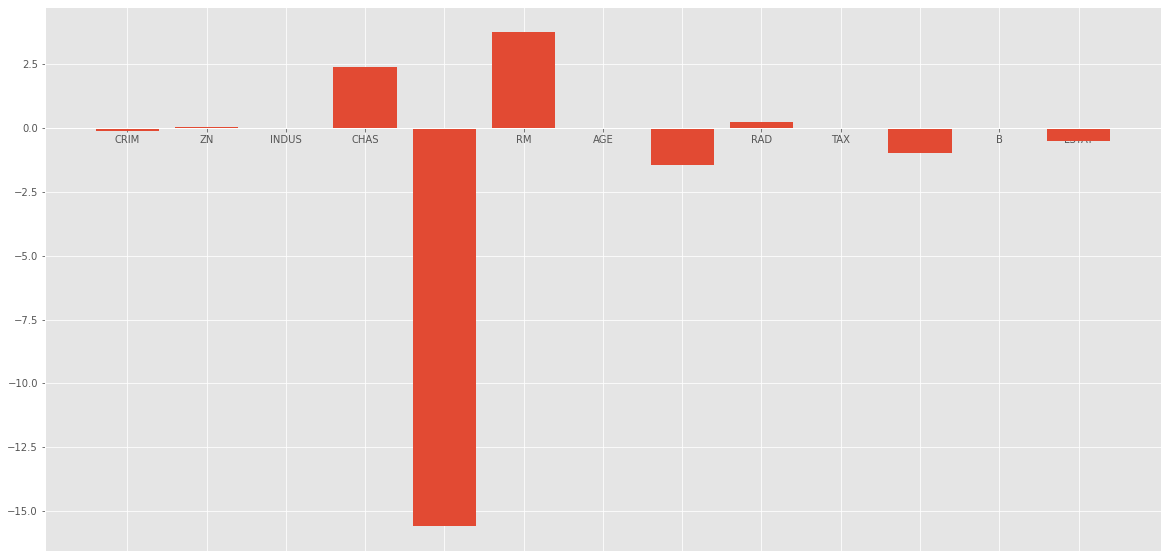

In [26]:
## ploting the coefficeint score

fig , ax = plt.subplots(figsize = (20 ,10))

ax.bar(linear_reg_coeff['Columns'],linear_reg_coeff['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Ridge regression

In [35]:
from sklearn.linear_model import Ridge

## train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train,y_train)
y_pred = ridgeR.predict(X_test)

## squared mean error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

print("----------------------------------")

## ridge coefficients
ridge_coeff = pd.DataFrame()
ridge_coeff['Columns'] = X_train.columns
ridge_coeff['Coefficient Estimates'] = pd.Series(ridgeR.coef_)
print(ridge_coeff)

30.504923770804748
----------------------------------
    Columns  Coefficient Estimates
0      CRIM              -0.114786
1        ZN               0.045418
2     INDUS              -0.035403
3      CHAS               2.303291
4       NOX              -8.127445
5        RM               3.806341
6       AGE              -0.014282
7       DIS              -1.336939
8       RAD               0.216748
9       TAX              -0.011755
10  PTRATIO              -0.903937
11        B               0.008813
12    LSTAT              -0.507425


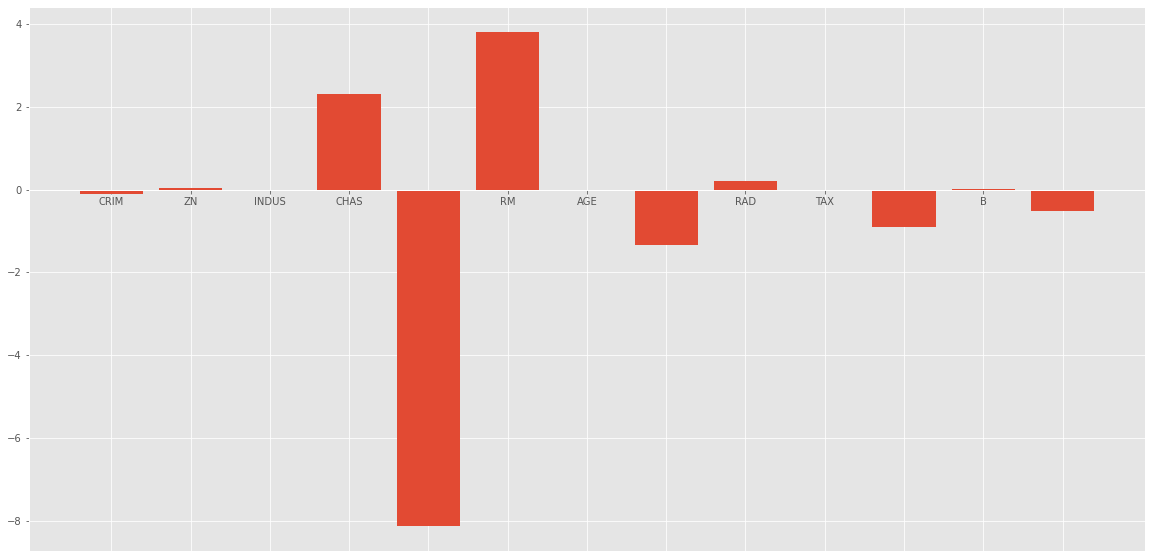

In [30]:
## ploting the coefficeint score

fig , ax = plt.subplots(figsize = (20 ,10))

ax.bar(ridge_coeff['Columns'],ridge_coeff['Coefficient Estimates'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Lasso regression

In [36]:
from sklearn.linear_model import Lasso

## train the model
lassoR = Lasso(alpha = 1)
lassoR.fit(X_train,y_train)
y_pred = lassoR.predict(X_test)

## squared mean error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

print("----------------------------------")

## ridge coefficients
lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lassoR.coef_)
print(lasso_coeff)

36.63182007429979
----------------------------------
    Columns  Coefficient Estimates
0      CRIM              -0.058738
1        ZN               0.049994
2     INDUS              -0.001589
3      CHAS               0.000000
4       NOX              -0.000000
5        RM               0.761785
6       AGE               0.013047
7       DIS              -0.710109
8       RAD               0.195516
9       TAX              -0.014148
10  PTRATIO              -0.805246
11        B               0.007098
12    LSTAT              -0.742146


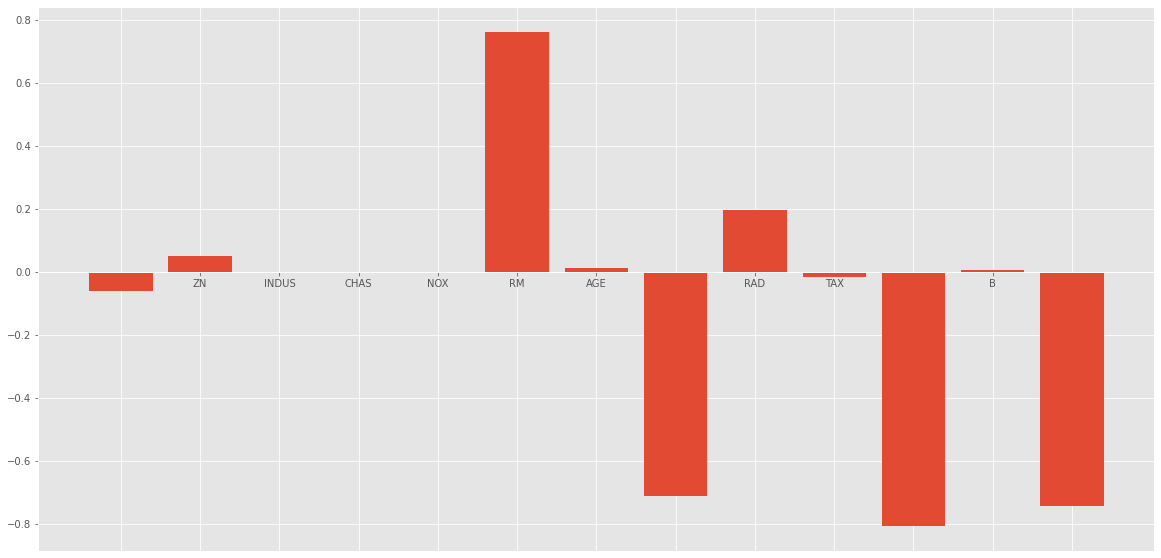

In [33]:
## ploting the coefficeint score

fig , ax = plt.subplots(figsize = (20 ,10))

ax.bar(lasso_coeff['Columns'],lasso_coeff['Coefficient Estimates'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()